In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cointegration_mult as mult

In [2]:
path_data_cart = 'datasets/data_cart.csv'

In [3]:
data = pd.read_csv(path_data_cart, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

22/04/2019 to 03/07/2020
data: (300, 71)
pairs: (1891, 12)


In [4]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,AZUL4,0.027889,95,0.116924,9,0.615310,1.063222,Short/Long,3,"100,240,250"
1,100,ABEV3,B3SA3,0.000251,99,0.233215,2,0.628780,0.325987,Long/Short,1,100
2,240,ABEV3,BBAS3,0.043768,95,0.220042,9,0.551764,0.844451,Short/Long,6,"100,160,180,200,220,240"
3,250,ABEV3,BBDC3,0.037017,95,0.341522,11,0.578437,0.877278,Short/Long,8,"100,120,140,160,180,200,220,250"
4,250,ABEV3,BBDC4,0.022346,95,0.349013,11,0.564234,0.743316,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,100,VALE3,VIVT4,0.022978,95,1.285289,5,0.492360,0.296496,Long/Short,1,100
1887,250,VALE3,VVAR3,0.036134,95,1.145031,10,0.535655,0.332377,Short/Long,5,"100,200,220,240,250"
1888,160,VIVT4,VVAR3,0.015353,95,0.587231,5,0.431756,0.100794,Long/Short,4,"100,120,140,160"
1889,250,VIVT4,WEGE3,0.034176,95,0.439173,12,0.343904,0.891132,Long/Short,9,"100,120,140,160,180,200,220,240,250"


In [5]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 1) & (pairs['Signal'] <= 1.1)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(93, 12)

In [6]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 6)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,TAEE11,USIM5,0.000012,99,0.893375,4,0.485344,1.091713,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CSAN3,FLRY3,0.000225,99,2.325672,5,0.647742,1.093688,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,ENGI11,VVAR3,0.000469,99,1.580477,5,0.616080,1.057568,Long/Short,9,"100,120,140,160,180,200,220,240,250"
3,250,EGIE3,MULT3,0.001271,99,0.833117,6,0.587255,1.030847,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,220,BRKM5,MGLU3,0.004497,99,0.547133,6,0.617975,1.045475,Long/Short,7,"100,120,140,160,180,200,220"
5,250,CYRE3,HYPE3,0.000711,99,1.665973,6,0.596588,1.095825,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,BRFS3,CVCB3,0.001202,99,0.576618,7,0.466838,1.028056,Long/Short,7,"120,140,180,200,220,240,250"
7,220,LAME4,MGLU3,0.008236,99,0.417145,7,0.814593,1.014450,Long/Short,7,"100,120,140,160,180,200,220"
8,250,LREN3,USIM5,0.008343,99,3.818030,7,0.627927,1.065958,Long/Short,9,"100,120,140,160,180,200,220,240,250"
9,220,CYRE3,GOAU4,0.009305,95,3.167433,7,0.712856,1.051540,Short/Long,6,"100,140,160,180,200,220"


In [7]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [8]:
oper = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 9) & (pairs_signal['ADF'] >= 95) & (pairs_signal['HalfLife'] <= 6)]\
.sort_values(by=['HalfLife'], ascending=True).copy()
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,TAEE11,USIM5,0.000012,99,0.893375,4,0.485344,1.091713,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CSAN3,FLRY3,0.000225,99,2.325672,5,0.647742,1.093688,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,ENGI11,VVAR3,0.000469,99,1.580477,5,0.616080,1.057568,Long/Short,9,"100,120,140,160,180,200,220,240,250"
3,250,EGIE3,MULT3,0.001271,99,0.833117,6,0.587255,1.030847,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,250,CYRE3,HYPE3,0.000711,99,1.665973,6,0.596588,1.095825,Short/Long,9,"100,120,140,160,180,200,220,240,250"


In [11]:
#oper.iloc[[0,1,2]].to_csv('datasets/oper/06072020.csv', index=False)

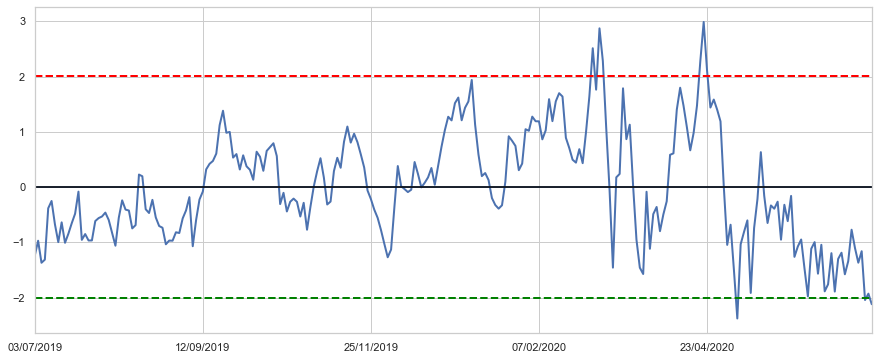

In [14]:
mult.plot_residue(mult.residue(data['ENGI11'], data['VVAR3'], 250))

In [12]:
mult.analysis_by_periods(data['SBSP3'], data['TAEE11'])

,Period,Stationary,Dickey-Fuller,ADF,Beta,HalfLife,Corr
0,100,True,0.010653,95,5.722677,3,0.621418
1,120,True,0.007307,99,5.449524,4,0.620175
2,140,True,0.019526,95,5.278662,5,0.608581
3,160,True,0.026219,95,4.542036,7,0.598616
4,180,True,0.015225,95,4.408481,7,0.593201
5,200,True,0.005870,99,4.462983,7,0.595282
6,220,True,0.004767,99,4.285034,7,0.588398
7,240,True,0.001914,99,4.246239,7,0.586822
8,250,True,0.001449,99,4.258682,7,0.585334


In [11]:
mult.dickey_fuller_ger(data['SBSP3'], data['TAEE11'], 250)

{'statistic': -3.046183111701164, 'adf': 0}